In [1]:
#@title K Nearst Neighbor Class Implementation
import numpy as np
from collections import Counter


class KNearstNeighbor:

    def train(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_data, k=1):
        nearst_neighbors = []
        for x in x_data:
            distances_between_points = self.__euclidean_distance(
                point_a=x,
                points_b=self.x_train,
                labels_b=self.y_train)
            
            # sort by distance and carry label within
            sorted_distances = sorted(
                distances_between_points, key=lambda t: t[0])
            nearst_neighbors.append(
                sorted_distances[:k]
            )

        return self.__vote(nearst_neighbors)

    def evaluate(self, X_test, y_test, k=1):
        y_pred = self.predict(X_test, k)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

    def __vote(self, nearst_neighbors):
        predicts = []
        for neighbors in nearst_neighbors:
            label_counter = Counter([neighbor[1] for neighbor in neighbors])
            [(predicted_label, _)] = label_counter.most_common(1)
            predicts.append([predicted_label])
        return predicts

    def __euclidean_distance(self, point_a, points_b, labels_b):
        distances = []
        size_points_b = len(points_b)
        for i in range(size_points_b):
            point = points_b[i]
            point_label = labels_b[i][0]

            distance = np.sqrt(np.sum(np.square(
                    point_a - point)))
            distances.append(
                (distance, point_label))
        return distances

170498071/170498071 [==============================] - 4s 0us/step


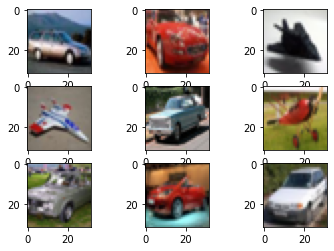

In [2]:
#@title Download cifar10 dataset and see some samples

from matplotlib import pyplot as plt
from keras.datasets import cifar10

def see_some_samples(traing_x):
    for i in range(9):
         plt.subplot(330 + 1 + i)
         plt.imshow(traing_x[i])
    plt.show()

# include indexes in array to separate by classes 
#Label	Description
#0	airplane
#1	automobile
#2	bird
#3	cat
#4	deer
#5	dog
#6	frog
#7	horse
#8	ship
#9	truck
classes_to_use = [0, 1]


(traing_x, traing_y), (test_x, test_y) = cifar10.load_data()
classes_training = np.isin(traing_y, classes_to_use).flatten()
classes_testing = np.isin(test_y, classes_to_use).flatten()
traing_x = traing_x[classes_training]
traing_y = traing_y[classes_training]
test_x = test_x[classes_testing]
test_y = test_y[classes_testing]

# limit samples at 500 to avoid evalute to get slow
# as KNN is quite slow
SAMPLES_COUNT = 500
traing_x = traing_x[:SAMPLES_COUNT]
traing_y = traing_y[:SAMPLES_COUNT]

test_x = test_x[:SAMPLES_COUNT]
test_y = test_y[:SAMPLES_COUNT]
see_some_samples(traing_x)

In [ ]:
knn_classifier = KNearstNeighbor()
knn_classifier.train(
    x_train=traing_x,
    y_train=traing_y)
accuracy = knn_classifier.evaluate(test_x, test_y, k=33)

print(f'accuracy was {round(accuracy[0], 2) * 100} %')